In [373]:
import itertools as it
import more_itertools as more_it
import numpy as np
import operator
from collections import namedtuple
import csv
import statistics
import time
import pprint
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Table of contents**<a id='toc0_'></a>    
- [Formula 1 times](#toc1_)    
  - [Construct a `.csv` reader.](#toc1_1_)    
  - [Sort drivers in ascending order by `Q3` time.](#toc1_2_)    
  - [Group drivers by the Team they for which they are driving.](#toc1_3_)    
  - [Calculate the average qualifying time by each car](#toc1_4_)    
- [Logistic map](#toc2_)    
  - [Construct a recurrence relation to map the logistic equation](#toc2_1_)    
  - [Use the logistic map to generate a set of data to plot](#toc2_2_)    
  - [Perform a mapping across the `r_val_range`.](#toc2_3_)    
  - [Visualize some slices from this diagram.](#toc2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Formula 1 times](#toc0_)

We have a list of Qualifying times from the Melbourne GP of 2023. The data is located in `f1_australia_2023_qualifying_times.csv`.

If you open the file externally, you will notice that the qualifying times are all out of order. 

Let's attempt to fix this! We will start with the following sequence of tasks:


## <a id='toc1_1_'></a>[Construct a `.csv` reader.](#toc0_)

We will refer to our previous presenter Roger's notes here! The goal would be to generate a `namedTuple` with the field names as `'Pos', 'Driver','Car','Q3'`


The desired output is as follows:

```python

[DriverData(Pos='9', Driver='#10 Pierre Gasly ', Car='Alpine F1 Team ', Q3='1:17.675 '),
 DriverData(Pos='14', Driver='#20 Kevin Magnussen ', Car='Haas F1 Team ', Q3='1:18.129 '),
 DriverData(Pos='4', Driver='#14 Fernando Alonso ', Car='Aston Martin ', Q3='1:17.139 '),
 DriverData(Pos='17', Driver='#24 Guanyu Zhou ', Car='Alfa Romeo ', Q3='1:18.540 '),
 DriverData(Pos='2', Driver='#63 George Russell ', Car='Mercedes ', Q3='1:16.968 '),
 DriverData(Pos='7', Driver='#16 Charles Leclerc ', Car='Ferrari ', Q3='1:17.369 '),
 DriverData(Pos='8', Driver='#23 Alexander Albon ', Car='Williams ', Q3='1:17.609 '),
 DriverData(Pos='12', Driver='#22 Yuki Tsunoda ', Car='AlphaTauri ', Q3='1:18.099 '),
 DriverData(Pos='1', Driver='#1 Max Verstappen ', Car='Red Bull ', Q3='1:16.732 '),
 DriverData(Pos='11', Driver='#31 Esteban Ocon ', Car='Alpine F1 Team ', Q3='1:17.768 '),
 DriverData(Pos='13', Driver='#4 Lando Norris ', Car='McLaren ', Q3='1:18.119 '),
 DriverData(Pos='3', Driver='#44 Lewis Hamilton ', Car='Mercedes ', Q3='1:17.104 '),
 DriverData(Pos='15', Driver='#21 Nyck de Vries ', Car='AlphaTauri ', Q3='1:18.335 '),
 DriverData(Pos='6', Driver='#18 Lance Stroll ', Car='Aston Martin ', Q3='1:17.308 '),
 DriverData(Pos='10', Driver='#27 Nico Hülkenberg ', Car='Haas F1 Team ', Q3='1:17.735 '),
 DriverData(Pos='5', Driver='#55 Carlos Sainz ', Car='Ferrari ', Q3='1:17.270 '),
 DriverData(Pos='18', Driver='#2 Logan Sargeant ', Car='Williams ', Q3='1:18.557 '),
 DriverData(Pos='16', Driver='#81 Oscar Piastri ', Car='McLaren ', Q3='1:18.517 '),
 DriverData(Pos='19', Driver='#77 Valtteri Bottas ', Car='Alfa Romeo ', Q3='1:18.714 ')]

```

**Hint**: No problem if you don't recall Roger's approach! I have it all in a cell below. You can adapt it to our requirements.

In [374]:
headers = [
    'customer_id',
    'gender',
    'age',
    'annual_income',
    'spending_score',
    'profession',
    'work_experience',
    'family_size'
    ]
# Please modify the headers as 'Pos', 'Driver','Car','Q3'.
# Make sure to read in the correct file!

CustomerData = namedtuple("CustomerData",headers)

with open("Customers.csv", newline="") as csvfile:
    customer_reader = csv.reader(csvfile)
    headers = next(customer_reader)
    customers = [
        CustomerData._make(row)
        for row in customer_reader
    ]
        
pprint.pprint(f"{customers[0] = }")

("customers[0] = CustomerData(customer_id='1', gender='Male', age='19', "
 "annual_income='15000', spending_score='39', profession='Healthcare', "
 "work_experience='1', family_size='4')")


In [375]:
headers = ['Pos','Driver','Car','Q3']


DriverData = namedtuple("DriverData",headers)

with open("f1_australia_2023_qualifying_times.csv", newline="") as csvfile:
    customer_reader = csv.reader(csvfile)
    headers = next(customer_reader)
    drivers = [
        DriverData._make(row)
        for row in customer_reader
    ]
        
pprint.pprint(drivers)

[DriverData(Pos='9', Driver='#10 Pierre Gasly ', Car='Alpine F1 Team ', Q3='1:17.675 '),
 DriverData(Pos='14', Driver='#20 Kevin Magnussen ', Car='Haas F1 Team ', Q3='1:18.129 '),
 DriverData(Pos='4', Driver='#14 Fernando Alonso ', Car='Aston Martin ', Q3='1:17.139 '),
 DriverData(Pos='17', Driver='#24 Guanyu Zhou ', Car='Alfa Romeo ', Q3='1:18.540 '),
 DriverData(Pos='2', Driver='#63 George Russell ', Car='Mercedes ', Q3='1:16.968 '),
 DriverData(Pos='7', Driver='#16 Charles Leclerc ', Car='Ferrari ', Q3='1:17.369 '),
 DriverData(Pos='8', Driver='#23 Alexander Albon ', Car='Williams ', Q3='1:17.609 '),
 DriverData(Pos='12', Driver='#22 Yuki Tsunoda ', Car='AlphaTauri ', Q3='1:18.099 '),
 DriverData(Pos='1', Driver='#1 Max Verstappen ', Car='Red Bull ', Q3='1:16.732 '),
 DriverData(Pos='11', Driver='#31 Esteban Ocon ', Car='Alpine F1 Team ', Q3='1:17.768 '),
 DriverData(Pos='13', Driver='#4 Lando Norris ', Car='McLaren ', Q3='1:18.119 '),
 DriverData(Pos='3', Driver='#44 Lewis Hamilton

## <a id='toc1_2_'></a>[Sort drivers in ascending order by `Q3` time.](#toc0_)

For this task, we need to access the `namedtuple` for each driver, specifically the field `Q3`. Note that there is also a lagging space in the string. 

- We will have to figure out a way to convert a string to a `datetime` object. (**Technically**, you can sort by the string itself, but, eh, why not practice a little?)
- e.g.: `'1:16.732 '` becomes `76732`. Formula 1 times are recorded as `<min>:<Sec>.<milliseconds>`.
- I'm saving you the trouble by giving you a code snippet you can directly use.
- I have a very analogous example below.

```python
    def convert_time_string_to_ms(min_sec_string):
        """Example: 1:16.732 
            Note that there is a lagging space.
            Strip the space, then split at the :.

        Args:
            min_sec_string (str): Driver time string

        Returns:
            int: time in milliseconds
        """
        minutes, seconds = min_sec_string.strip( ).split(':')
        return int((float(minutes) * 60 + float(seconds)) * 1000)

    convert_time_string_to_ms('1:16.732 ')
    >>>> 76732
    
```

**Our actual tasks**

- We will use `itrtools.groupby` for this task!

**Some quirks and notes about using `itertools.groupby`:**

- You need to `sort` the data first!
- For this, we can use `sorted`, in which you can provide a `key` for sorting. See the example below:

```python
    zipped_iterable = list(zip([1,2,3],['c','b','a']))
    >>>> [(1, 'c'), (2, 'b'), (3, 'a')]

    # We want to sort by the first element in each tuple
    sorted(zipped_iterable, key=lambda x: x[0])
    >>>> [(1, 'c'), (2, 'b'), (3, 'a')]
```
    
- In our case, we want the `key` to be each driver's `Q3` time.

- **Sort the data**, and then feed the data to `groupby`. You will need to **specify the `key` to use for `groupby`.

```python

    groups = []
    uniquekeys = []
    keyfunc = sorted # You need to modify the key to group by, e.g.: Time, car, etc.
    data = sorted(data, key=keyfunc)
    for k, g in groupby(data, keyfunc):
        groups.append(list(g))      # Store group iterator as a list
        uniquekeys.append(k)

```

I'm doing some additional `f-string` parsing, but the main point is that the drivers are ranked according to their time.

```python

    Time [ms]: 76732 - Driver: [('#1 Max Verstappen ', '1:16.732 ')])
    Time [ms]: 76968 - Driver: [('#63 George Russell ', '1:16.968 ')])
    Time [ms]: 77104 - Driver: [('#44 Lewis Hamilton ', '1:17.104 ')])
    Time [ms]: 77139 - Driver: [('#14 Fernando Alonso ', '1:17.139 ')])
    Time [ms]: 77270 - Driver: [('#55 Carlos Sainz ', '1:17.270 ')])
    Time [ms]: 77308 - Driver: [('#18 Lance Stroll ', '1:17.308 ')])
    Time [ms]: 77369 - Driver: [('#16 Charles Leclerc ', '1:17.369 ')])
    Time [ms]: 77609 - Driver: [('#23 Alexander Albon ', '1:17.609 ')])
    Time [ms]: 77675 - Driver: [('#10 Pierre Gasly ', '1:17.675 ')])
    Time [ms]: 77735 - Driver: [('#27 Nico Hülkenberg ', '1:17.735 ')])
    Time [ms]: 77768 - Driver: [('#31 Esteban Ocon ', '1:17.768 ')])
    Time [ms]: 78099 - Driver: [('#22 Yuki Tsunoda ', '1:18.099 ')])
    Time [ms]: 78119 - Driver: [('#4 Lando Norris ', '1:18.119 ')])
    Time [ms]: 78129 - Driver: [('#20 Kevin Magnussen ', '1:18.129 ')])
    Time [ms]: 78335 - Driver: [('#21 Nyck de Vries ', '1:18.335 ')])
    Time [ms]: 78517 - Driver: [('#81 Oscar Piastri ', '1:18.517 ')])
    Time [ms]: 78539 - Driver: [('#24 Guanyu Zhou ', '1:18.540 ')])
    Time [ms]: 78557 - Driver: [('#2 Logan Sargeant ', '1:18.557 ')])
    Time [ms]: 78714 - Driver: [('#77 Valtteri Bottas ', '1:18.714 ')])

```

In [376]:
def convert_time_string_to_ms(min_sec_string):
    """Example: 1:16.732 
        Note that there is a lagging space.
        Strip the space, then split at the :.

    Args:
        min_sec_string (str): Driver time string

    Returns:
        int: time in milliseconds
    """
    minutes, seconds = min_sec_string.strip( ).split(':')
    return int((float(minutes) * 60 + float(seconds)) * 1000)

def convert_ms_to_time_string(millis):
    """Converts millisecond integer to human-readable form

    Args:
        millis (int): time in milliseconds 

    Returns:
        str: human-readable time in min.sec.milli
    """
    # Courtesy: Chat GPT!
    # Calculate total number of seconds and remaining milliseconds
    total_seconds = int(millis / 1000)
    remaining_millis = millis % 1000

    # Calculate minutes and remaining seconds
    minutes = int(total_seconds / 60)
    seconds = total_seconds % 60

    # Return minutes and seconds as a tuple
    return f"{minutes}:{seconds}.{remaining_millis}"


In [377]:
# key = lambda x: datetime.strptime(x.Q3.strip(' '),'%M:%S.%f')
key = lambda x: convert_time_string_to_ms(x.Q3)

# Note: it might seem like this isn't that useful considering the qualifying times only have one entry.
# You're right, but please wait for the next example!

sorted_data = sorted(drivers,key=key)

for this_car, this_car_group in it.groupby(sorted_data,key=key):
    print(f"Time [ms]: {this_car} - Driver: {[(n.Driver, n.Q3) for n in this_car_group]})")

Time [ms]: 76732 - Driver: [('#1 Max Verstappen ', '1:16.732 ')])
Time [ms]: 76968 - Driver: [('#63 George Russell ', '1:16.968 ')])
Time [ms]: 77104 - Driver: [('#44 Lewis Hamilton ', '1:17.104 ')])
Time [ms]: 77139 - Driver: [('#14 Fernando Alonso ', '1:17.139 ')])
Time [ms]: 77270 - Driver: [('#55 Carlos Sainz ', '1:17.270 ')])
Time [ms]: 77308 - Driver: [('#18 Lance Stroll ', '1:17.308 ')])
Time [ms]: 77369 - Driver: [('#16 Charles Leclerc ', '1:17.369 ')])
Time [ms]: 77609 - Driver: [('#23 Alexander Albon ', '1:17.609 ')])
Time [ms]: 77675 - Driver: [('#10 Pierre Gasly ', '1:17.675 ')])
Time [ms]: 77735 - Driver: [('#27 Nico Hülkenberg ', '1:17.735 ')])
Time [ms]: 77768 - Driver: [('#31 Esteban Ocon ', '1:17.768 ')])
Time [ms]: 78099 - Driver: [('#22 Yuki Tsunoda ', '1:18.099 ')])
Time [ms]: 78119 - Driver: [('#4 Lando Norris ', '1:18.119 ')])
Time [ms]: 78129 - Driver: [('#20 Kevin Magnussen ', '1:18.129 ')])
Time [ms]: 78335 - Driver: [('#21 Nyck de Vries ', '1:18.335 ')])
Time 

## <a id='toc1_3_'></a>[Group drivers by the Team they for which they are driving.](#toc0_)

Now, we will revise the key as `Driver.Car`.

Again, **Sort** first, before sending the data over to `groupby`. 

You should be able to see that each team has two drivers, except for Red Bull, where Sergio started from the pits.
In my case, I ran a list comprehension for each group to get both the driver name and time in one line.


```python

    Car: Alfa Romeo  - Driver(s): [('#24 Guanyu Zhou ', '1:18.540 '), ('#77 Valtteri Bottas ', '1:18.714 ')])
    Car: AlphaTauri  - Driver(s): [('#22 Yuki Tsunoda ', '1:18.099 '), ('#21 Nyck de Vries ', '1:18.335 ')])
    Car: Alpine F1 Team  - Driver(s): [('#10 Pierre Gasly ', '1:17.675 '), ('#31 Esteban Ocon ', '1:17.768 ')])
    Car: Aston Martin  - Driver(s): [('#14 Fernando Alonso ', '1:17.139 '), ('#18 Lance Stroll ', '1:17.308 ')])
    Car: Ferrari  - Driver(s): [('#16 Charles Leclerc ', '1:17.369 '), ('#55 Carlos Sainz ', '1:17.270 ')])
    Car: Haas F1 Team  - Driver(s): [('#20 Kevin Magnussen ', '1:18.129 '), ('#27 Nico Hülkenberg ', '1:17.735 ')])
    Car: McLaren  - Driver(s): [('#4 Lando Norris ', '1:18.119 '), ('#81 Oscar Piastri ', '1:18.517 ')])
    Car: Mercedes  - Driver(s): [('#63 George Russell ', '1:16.968 '), ('#44 Lewis Hamilton ', '1:17.104 ')])
    Car: Red Bull  - Driver(s): [('#1 Max Verstappen ', '1:16.732 ')])
    Car: Williams  - Driver(s): [('#23 Alexander Albon ', '1:17.609 '), ('#2 Logan Sargeant ', '1:18.557 ')])

```

In [378]:
key = lambda x: x.Car

sorted_data = sorted(drivers,key=key)

for this_car, this_car_group in it.groupby(sorted_data,key=key):
    print(f"Car: {this_car} - Driver(s): {[(n.Driver, n.Q3) for n in this_car_group]})")

Car: Alfa Romeo  - Driver(s): [('#24 Guanyu Zhou ', '1:18.540 '), ('#77 Valtteri Bottas ', '1:18.714 ')])
Car: AlphaTauri  - Driver(s): [('#22 Yuki Tsunoda ', '1:18.099 '), ('#21 Nyck de Vries ', '1:18.335 ')])
Car: Alpine F1 Team  - Driver(s): [('#10 Pierre Gasly ', '1:17.675 '), ('#31 Esteban Ocon ', '1:17.768 ')])
Car: Aston Martin  - Driver(s): [('#14 Fernando Alonso ', '1:17.139 '), ('#18 Lance Stroll ', '1:17.308 ')])
Car: Ferrari  - Driver(s): [('#16 Charles Leclerc ', '1:17.369 '), ('#55 Carlos Sainz ', '1:17.270 ')])
Car: Haas F1 Team  - Driver(s): [('#20 Kevin Magnussen ', '1:18.129 '), ('#27 Nico Hülkenberg ', '1:17.735 ')])
Car: McLaren  - Driver(s): [('#4 Lando Norris ', '1:18.119 '), ('#81 Oscar Piastri ', '1:18.517 ')])
Car: Mercedes  - Driver(s): [('#63 George Russell ', '1:16.968 '), ('#44 Lewis Hamilton ', '1:17.104 ')])
Car: Red Bull  - Driver(s): [('#1 Max Verstappen ', '1:16.732 ')])
Car: Williams  - Driver(s): [('#23 Alexander Albon ', '1:17.609 '), ('#2 Logan Sar

## <a id='toc1_4_'></a>[Calculate the average qualifying time by each car](#toc0_)

For each car, there is likely at least two drivers. The average time of each driver needs to be calculated. we will use `statistics.mean` package for this. I already have the code ready for you.

```python
    def calculate_mean(numbers):
    return convert_ms_to_time_string(statistics.mean(numbers))

    # Say we have two drivers for the team driving the times in the list. 
    # The function calculates the mean, and returns the value in human readable form.
    calculate_mean([323121,341212])
    >>>> '5:32.166.5'
```

- First, get an iterable with the driver times for each group. The key in this case should be `Car`.
    - As usual, **Sort** first.
    - Think about using a `starmap` on each group.
    - For you to use a `starmap`, you will likely need to make the group into a zipped object.
    - For `starmap` you can use a `lambda` expression as the function. Something like: `lambda x: convert_time_string_to_ms(x.Q3)`.

- Once you have the list of values, you can use `calculate_mean` to directly obtain the mean value.

In [379]:
def calculate_mean(numbers):
    """Calculate mean time in milliseconds, and returns value in human-readable form.

    Args:
        numbers (list): iterable of times in milliseconds

    Returns:
        str: convert mean value to string
    """
    return convert_ms_to_time_string(statistics.mean(numbers))


In [380]:
key = lambda x: x.Car

sorted_data = sorted(drivers,key=key)

for this_car, this_car_group in it.groupby(sorted_data,key=key):
    # Get the driver times in ms for each car group.
    driver_times = list(it.starmap(lambda x: convert_time_string_to_ms(x.Q3), zip(this_car_group)))
    print(f"Team: {this_car} - Mean quali time: {calculate_mean(driver_times)}")


Team: Alfa Romeo  - Mean quali time: 1:18.626.5
Team: AlphaTauri  - Mean quali time: 1:18.217
Team: Alpine F1 Team  - Mean quali time: 1:17.721.5
Team: Aston Martin  - Mean quali time: 1:17.223.5
Team: Ferrari  - Mean quali time: 1:17.319.5
Team: Haas F1 Team  - Mean quali time: 1:17.932
Team: McLaren  - Mean quali time: 1:18.318
Team: Mercedes  - Mean quali time: 1:17.36
Team: Red Bull  - Mean quali time: 1:16.732
Team: Williams  - Mean quali time: 1:18.83


# <a id='toc2_'></a>[Logistic map](#toc0_)

We are going to explore the interesting behavior of the logistic map, particularly, how a seemingly simple deterministic recursive mapping, can _very easily_ generate chaotic behavior. This is a ridiculously important topic on anything and everything from biology to dynamic systems (ok, fine, biology _is_ a dynamic system.) 

I'd highly encourage you to enjoy the beauty of this topic from Veritassium [here](https://www.youtube.com/watch?v=ovJcsL7vyrk).

Steven Strogatz is one of many legends in this field, and his book Non-linear Dynamics and Chaos deserves a spetial mentioning here as well. I'd also encourage for you to check out his podcasts [here](https://podcasts.apple.com/us/podcast/the-joy-of-x/id1495067186).


For our discussions the logistic map is defined as 

$$
  s_n = rs_{n-1}(1 - s_{n-1})
$$

where $S_{n-1}$ is a number between zero and one. This is the ratio of an existing population to the maximum possible population. The interesting values for parameter `r` are in the region of `[0,4]`. We will investigate the behavior of this equation at some specific values!

## <a id='toc2_1_'></a>[Construct a recurrence relation to map the logistic equation](#toc0_)

Recall from our previous discussion on how first and second order recurrence relations are mapped.

```python

    def first_order(p, q, initial_val):
        """Return sequence defined by s(n) = p * s(n-1) + q."""
        return it.accumulate(it.repeat(initial_val), lambda s, _: p*s + q)


    def second_order(p, q, r, initial_values):
        """Return sequence defined by s(n) = p * s(n-1) + q * s(n-2) + r."""
        intermediate = it.accumulate(
            it.repeat(initial_values),
            lambda s, _: (s[1], p*s[1] + q*s[0] + r)
        )
        return map(lambda x: x[0], intermediate)

```

- We can see that the next term in the logistic map depends _only_ on the previous term, given a specific value of `r`.

**TODO:** Please construct a first order recurrence relation for the logistic map using the examples.

In [381]:
def first_order_logistic_map(r,initial_val):
    return it.accumulate(it.repeat(initial_val), lambda s, _: (r*s)*(1-s))
    

## <a id='toc2_2_'></a>[Use the logistic map to generate a set of data to plot](#toc0_)

- We will scan across a set of `r` values using the same initial start condition. I have already allocated some values for you.

In [382]:

# Value range for r
r_val_range = list(more_it.numeric_range(2.9,4,0.0001))

# Number of iterations
no_runs = 100

# Initial starting condition
init_val = 0.57

# Use numpy to pre-allocate the space to update during the mapping.

logistic_map_array = np.zeros((no_runs,len(r_val_range)))

## <a id='toc2_3_'></a>[Perform a mapping across the `r_val_range`.](#toc0_)

Once you've iterated through each range, we will update each column with the data.

(8000.0, 11000.0)

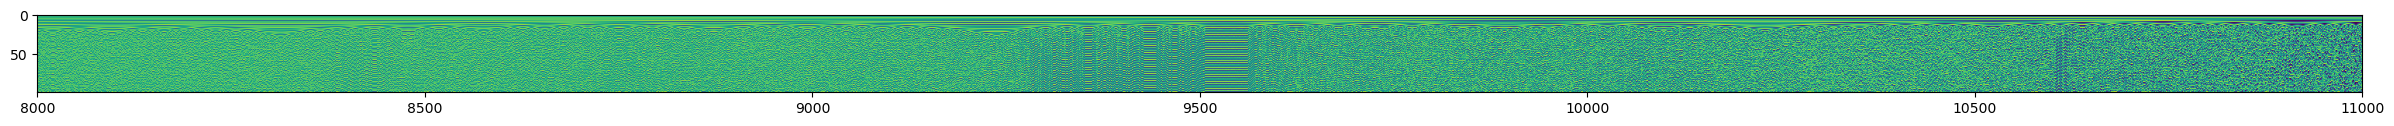

In [383]:
for i,this_r_val in enumerate(r_val_range):

    # Set up an iterator
    log_map = first_order_logistic_map(this_r_val,init_val)
    
    # Consume the iterator
    log_map_num = (list(next(log_map) for _ in range(no_runs)))

    # Allocate values of the iterator to pre-allocated matrix
    logistic_map_array[:,i] = log_map_num

# Let's visualize the data.
plt.figure(figsize=(30,20))
plt.imshow(logistic_map_array)
plt.xlim([8000, logistic_map_array.shape[1]])

## <a id='toc2_4_'></a>[Visualize some slices from this diagram.](#toc0_)

- You will need to use `more_itertools.locate` to identify the index that corresponds to each value in the `specific_r_vals`.
- You can combine `more_itertools.locate` with `itertools.takewhile` for this task.

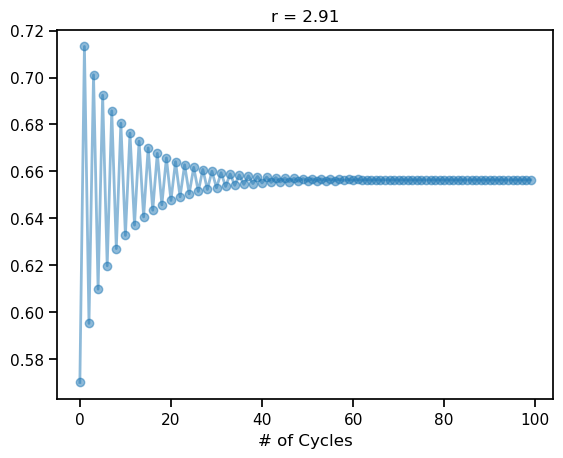

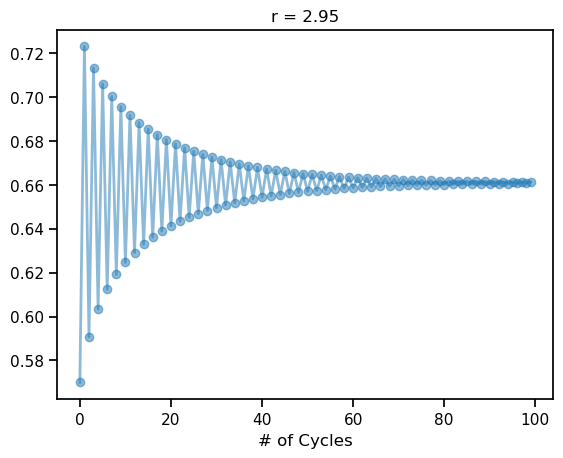

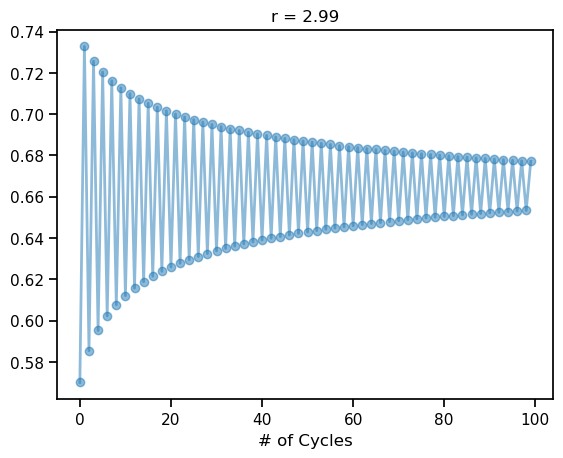

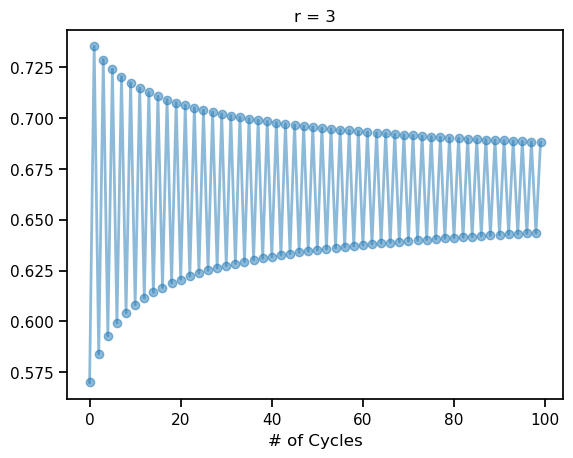

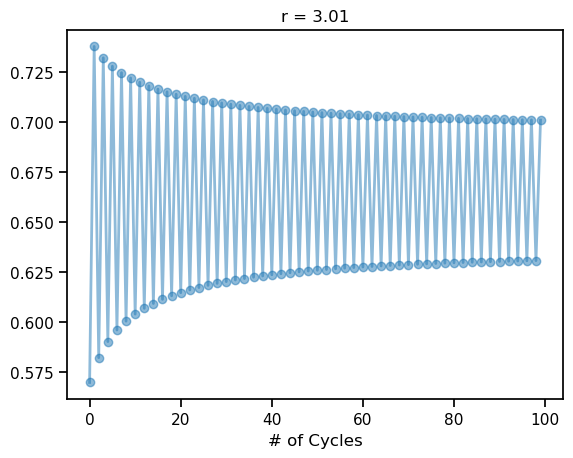

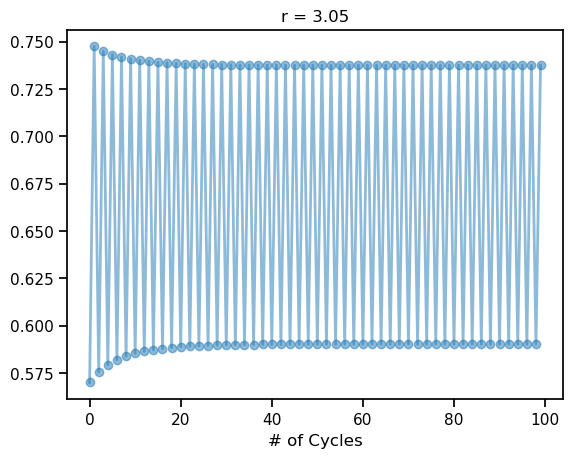

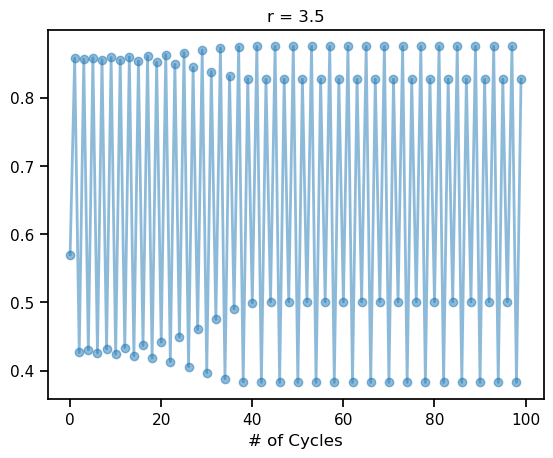

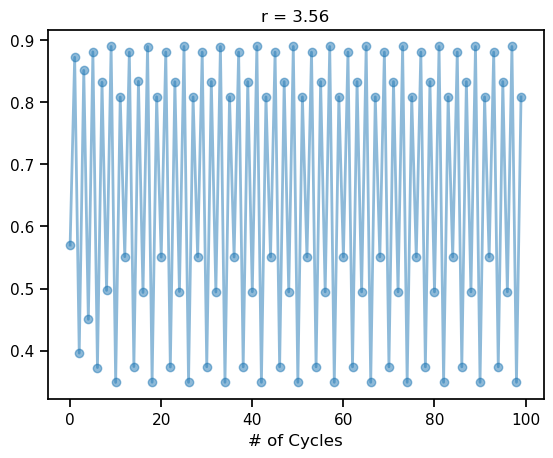

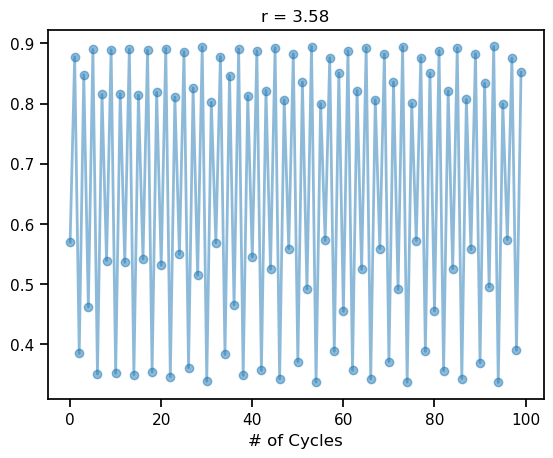

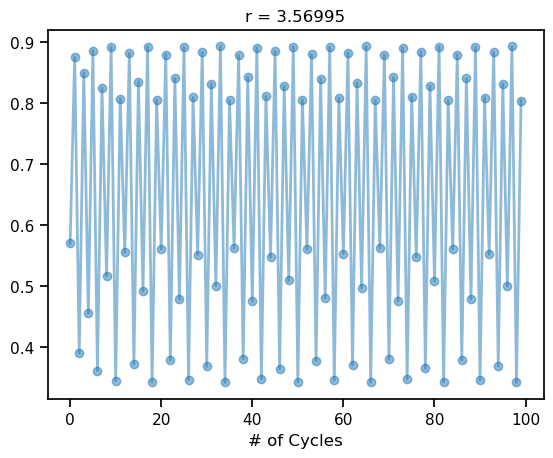

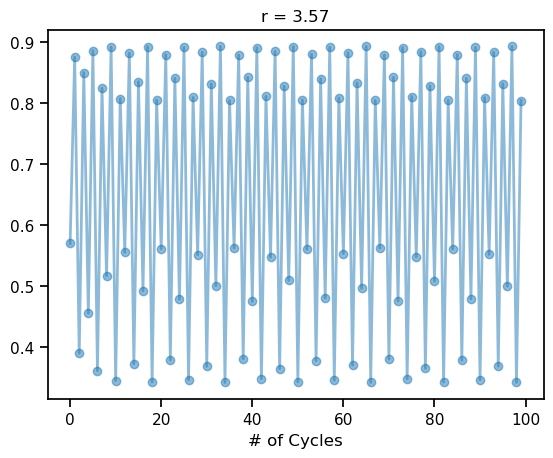

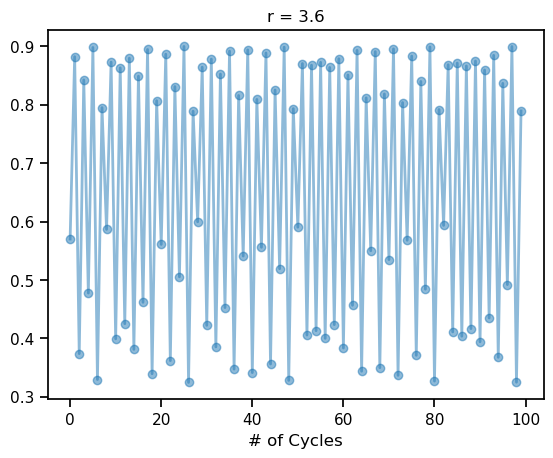

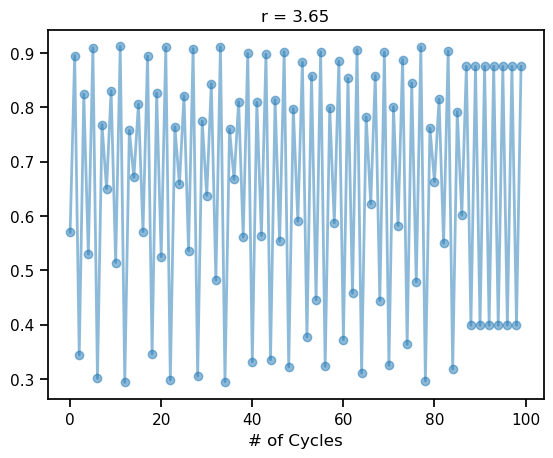

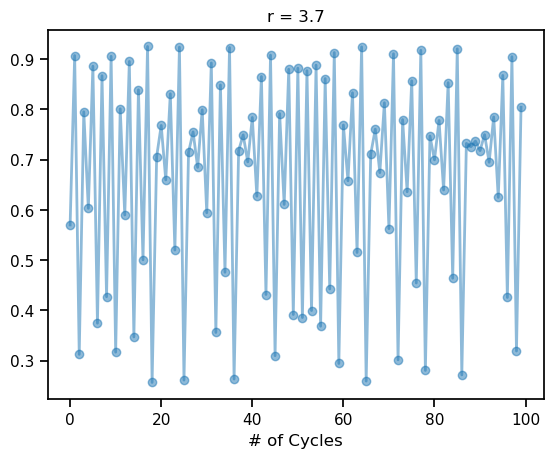

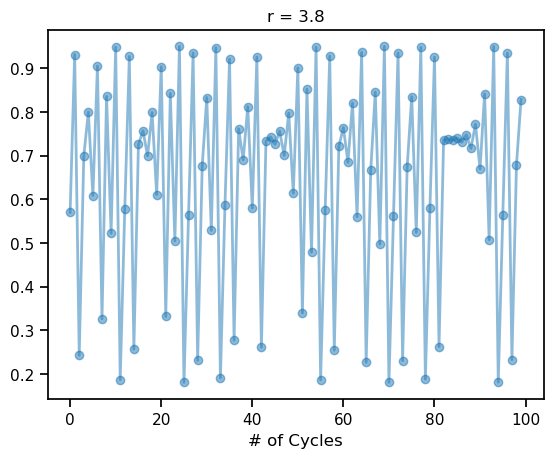

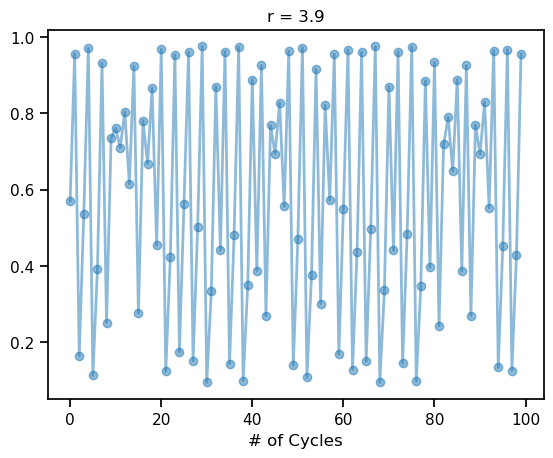

In [384]:
specific_r_vals = [2.91,2.95,2.99, 3, 3.01, 3.05, 3.5,3.56,3.58,3.56995,3.57, 3.6,3.65, 3.7, 3.8, 3.9]


for this_specific_r_val in specific_r_vals:
    with sns.plotting_context('notebook'):
        plt.figure()
        
        this_index = list(more_it.locate(it.takewhile(lambda x: x < this_specific_r_val, r_val_range)))[-1]
        plt.plot(logistic_map_array[:,this_index], label=f"r = {this_specific_r_val:.2f}",marker='o',lw=2,alpha=0.5)
        plt.xlabel('# of Cycles')
        plt.title(f"r = {this_specific_r_val}")